In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [ ]:
Initial Parameters

In [51]:
mu1       = 0.05
mu2       = 0.15
b1        = 0.03
b2        = 0.03
mu        = np.array([[mu1],[mu2]])
b         = np.array([[b1],[b2]])
gamma     = 1
Rf        =  np.array([[0.02],[0.02]])

In [81]:
def figure(rho,sigma1,sigma2):
    fig, ax = plt.subplots(figsize=(12, 8))

    k = 5

    XLL = X1(1,1,rho,sigma1,sigma2)
    path = Path([
        (-k,-k),
        (-k, XLL[1]),
        (XLL[0],XLL[1]),
        (XLL[0],-k)])
    patch = PathPatch(path, facecolor='green',label='LL', alpha=0.5)
    ax.add_patch(patch)

    XSS = X1(-1,-1,rho,sigma1,sigma2)
    path = Path([
        (XSS[0],XSS[1]),
        (XSS[0],k),
        (k,k),
        (k,XSS[1])])
    patch = PathPatch(path, facecolor='red',label='SS', alpha=0.5)
    ax.add_patch(patch)

    XLS = X1(1,-1,rho,sigma1,sigma2)
    path = Path([
        (-k,XLS[1]),
        (XLS[0],XLS[1]),
        (XLS[0],k),
        (-k,k)])
    patch = PathPatch(path, facecolor='blue',label='LS', alpha=0.5)
    ax.add_patch(patch)

    XSL = X1(-1,1,rho,sigma1,sigma2)
    path = Path([
        (XSL[0],-k),
        (k,-k),
        (k,XSL[1]),
        (XSL[0],XSL[1])])
    patch = PathPatch(path, facecolor='yellow',label='SL', alpha=0.5)
    ax.add_patch(patch)

    path = Path([
        (-k,XLS[1]),
        (-k, XLL[1]),
        (XLL[0],XLL[1]),
        (XLS[0],XLS[1])])
    patch = PathPatch(path, facecolor='orange',label='LN', alpha=0.5)
    ax.add_patch(patch)

    path = Path([
        (XSS[0],XSS[1]),
        (k,XSS[1]),
        (k,XSL[1]),
        (XSL[0],XSL[1])])
    patch = PathPatch(path, facecolor='purple',label='SN', alpha=0.5)
    ax.add_patch(patch)

    path = Path([
        (XSS[0],XSS[1]),
        (XLS[0],XLS[1]),
        (XLS[0],k),
        (XSS[0],k)])
    patch = PathPatch(path, facecolor='pink',label='NS', alpha=0.5)
    ax.add_patch(patch)

    path = Path([
        (XSL[0],-k),
        (XSL[0],XSL[1]),
        (XLL[0],XLL[1]),
        (XLL[0],-k)])
    patch = PathPatch(path, facecolor='cyan',label='NL', alpha=0.5)
    ax.add_patch(patch)
    
    path = Path([
        (XSS[0],XSS[1]),
        (XLS[0],XLS[1]),
        (float(XLL[0]),float(XLL[1])),
        (XSL[0],XSL[1])])
    patch = PathPatch(path, facecolor='white',label='NN', alpha=0.5)
    ax.add_patch(patch)
    
    plt.xlim(-5, k)
    plt.ylim(-5,k)
    plt.legend(fontsize=12)
    plt.xlabel('$X_{10}$',fontsize=15)
    plt.ylabel('$X_{20}$',fontsize=15)
    plt.title('Correlation: ' + str(rho) + ' / Sigma 1: ' + str(sigma1) + ' / Sigma 2: '+ str(sigma2),fontsize=15)
    plt.show()

In [76]:
def X1(s1,s2,rho,sigma1,sigma2):
    Sigma     = np.array([[sigma1**2,rho*sigma1*sigma2],[rho*sigma1*sigma2,sigma2**2]])
    Sigma_inv = np.linalg.inv(Sigma)
    return (1/gamma)*Sigma_inv.dot(mu - Rf - np.array([[b1*s1],[b2*s2]]))

## Initial parameters

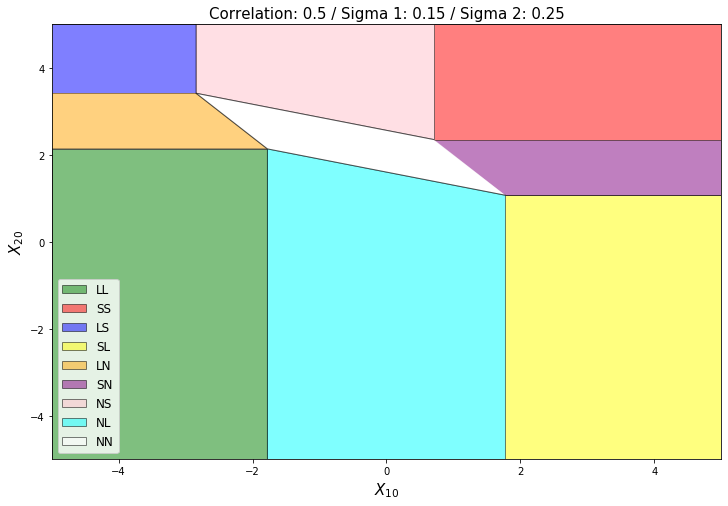

In [82]:
figure(0.5,0.15,0.25)

## Impact of correlation

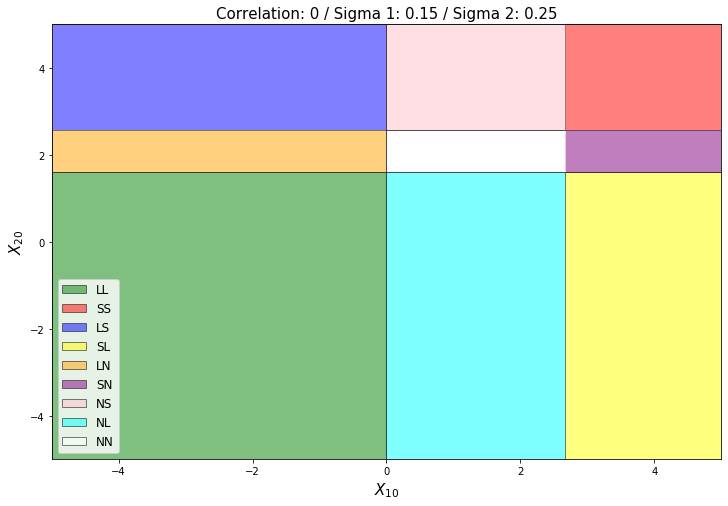

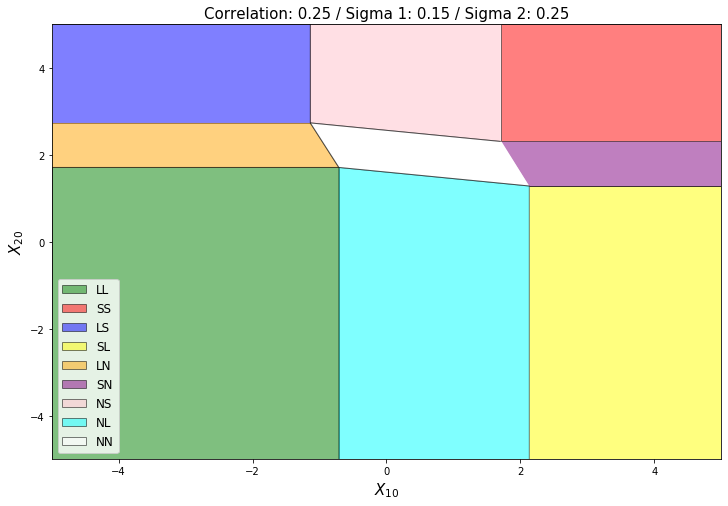

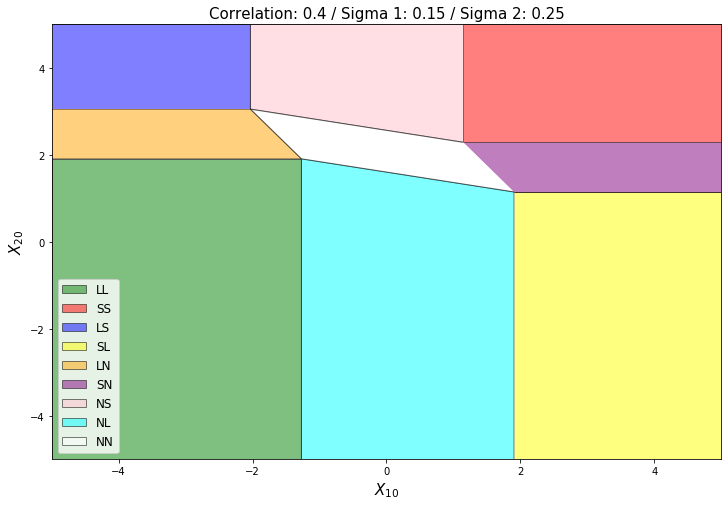

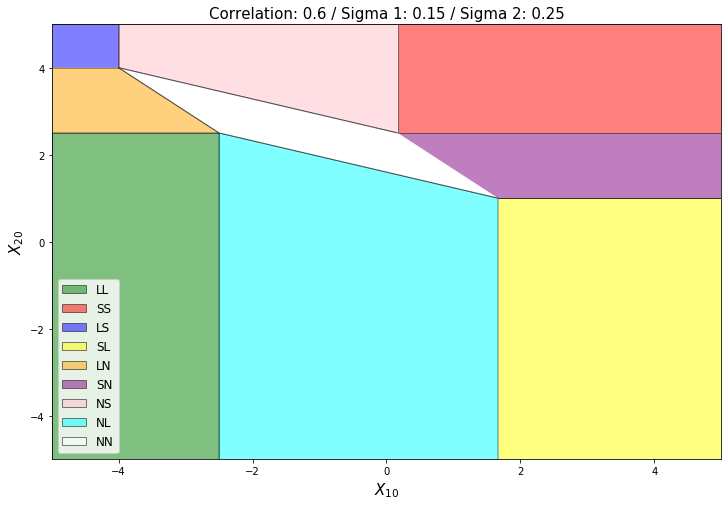

In [83]:
figure(0,0.15,0.25)
figure(0.25,0.15,0.25)
figure(0.4,0.15,0.25)
figure(0.6,0.15,0.25)

## Impact of volatility of asset 2

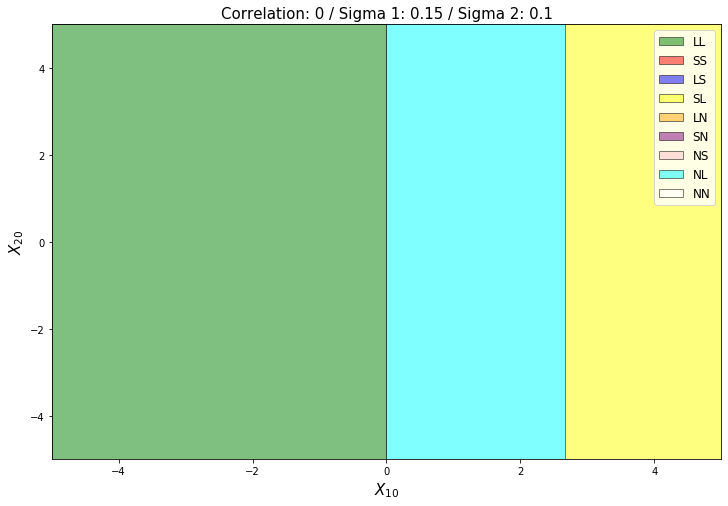

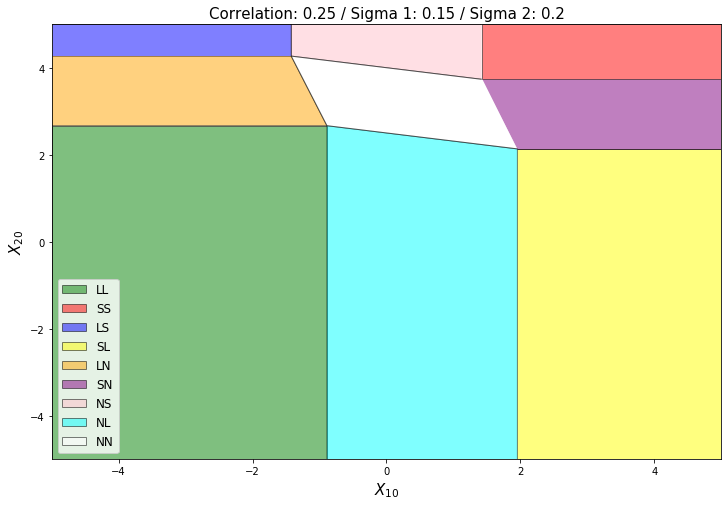

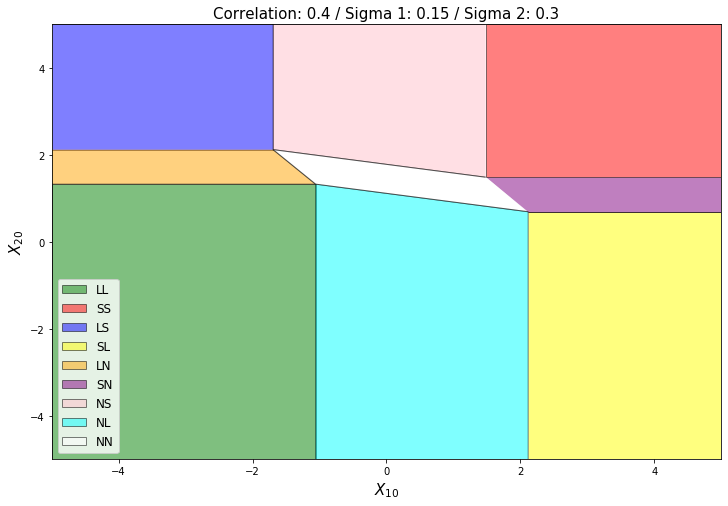

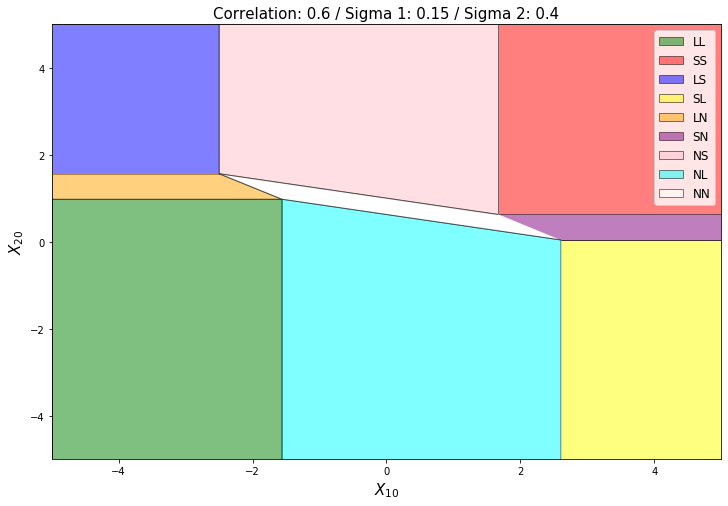

In [86]:
figure(0,0.15,0.10)
figure(0.25,0.15,0.20)
figure(0.4,0.15,0.30)
figure(0.6,0.15,0.40)